# Problem Set 3 - Ashwin Srinivas

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [18]:
import IPython
import numpy as np
import random
import scipy as sp
import pandas as pd
import matplotlib
import sklearn as sk
from sklearn.model_selection import train_test_split
import time

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()
bdata['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

The following commands will provide some basic information about the shape of the data:

In [4]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


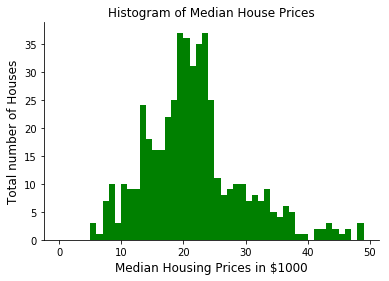

In [9]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
ax = plt.subplot(111)
ax.hist(bdata.target, color="green", lw=0, bins=range(0, 50, 1)) # setting bin width to $1000 and colour to green
plt.xlabel('Median Housing Prices in $1000', size = 12)
plt.ylabel('Total number of Houses', size = 12)
plt.title('Histogram of Median House Prices')

# Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


In [10]:
# convert the dataset into a data frame for easier understanding

df_boston = pd.DataFrame(bdata.data)

df_boston.columns = bdata.feature_names # populate column names from feature_names for the dataset

df_boston['PRICE'] = bdata.target # append the target i.e. the dependant variable to the data frame
print(df_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


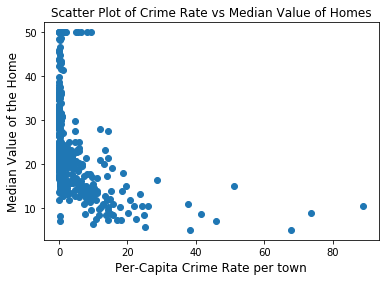

In [13]:
x = df_boston['CRIM']
y = df_boston['PRICE']

plt.scatter(x, y)
plt.xlabel('Per-Capita Crime Rate per town', size = 12)
plt.ylabel('Median Value of the Home', size = 12)
plt.title('Scatter Plot of Crime Rate vs Median Value of Homes')

plt.show()

Here we can see that median value of houses is clearly higher for homes with low per-capita crime rate.

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

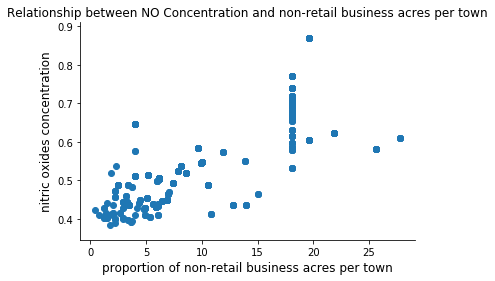

In [14]:
x = df_boston['INDUS']
y = df_boston['NOX']


ax = plt.subplot(111)
ax.scatter(x, y)
plt.xlabel('proportion of non-retail business acres per town', size = 12)
plt.ylabel('nitric oxides concentration', size = 12)
plt.title('Relationship between NO Concentration and non-retail business acres per town')
# Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [15]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Root Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    #print("type_predictions: ",type(predictions))
    #print("type_yvalues: ",type(yvalues))
    err = 0
    rmse = 0
    for i in range(0,len(predictions)):
        err+=(predictions[i]-yvalues[i])**2
    rmse = err/(2*len(predictions)) # formula as discussed in class during the gradient descent lecture
    return rmse

In [16]:
# test code
compute_rmse((2,2,3),(0,2,6))

2.1666666666666665

### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [50]:
# leave the following line untouched, it will help ensure that your "random" split 
# is the same "random" split used by the rest of the class
np.random.seed(seed=13579)


house_price = pd.DataFrame(df_boston['PRICE'],columns=['PRICE'])
print(house_price.head())

house_price['RAND'] = house_price.apply(lambda row: random.random(), axis=1) # add new column
house_price['TRAINING'] = (house_price['RAND']<=0.6666) # create flag column for values
bdata_train=house_price[house_price.TRAINING==True]
bdata_test=house_price[house_price.TRAINING==False]

print("Test Data Set: \n",bdata_test.head())
print("Training Data Set: \n",bdata_train.head())
print("Test length =",len(bdata_test))
print("Train length =",len(bdata_train))

   PRICE
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2
Test Data Set: 
     PRICE      RAND  TRAINING
1    21.6  0.673067     False
3    33.4  0.791315     False
13   20.4  0.979030     False
14   18.2  0.810673     False
15   19.9  0.929175     False
Training Data Set: 
    PRICE      RAND  TRAINING
0   24.0  0.005526      True
2   34.7  0.469445      True
4   36.2  0.633888      True
5   28.7  0.152115      True
6   22.9  0.247170      True
Test length = 169
Train length = 337


### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [51]:
# enter your# Calculate the mean of all median values in the training set
# This will be used to calculate the rmse for training and test sets

mean_y_train = bdata_train['PRICE'].mean() # mean of median house prices for training set for average value Baseline
print("Mean value of meadian home prices: ", mean_y_train)

# create empty list to hold mean values of Y of the training set
# This will be used to calculate training RMSE function that we defined above
y_train_list = [] 
for i in range(0,len(bdata_train)):
    y_train_list.append(mean_y_train)

print("Training size: ",len(y_mean_train_list)) # check if the list is populated correctly
print("Training elements: \n",y_mean_train_list[0:10])
# list to calculate test RMSE
y_test_list = []
for i in range(0,len(bdata_test)):
    y_test_list.append(mean_y_train)
    
print("Test set size :",len(y_mean_test_list)) # check if list was populated correctly code here
print("Test Set Elements: \n",y_mean_test_list[0:10])

Mean value of meadian home prices:  22.632640949554908
Training size:  331
Training elements: 
 [21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663]
Test set size : 175
Test Set Elements: 
 [21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663, 21.934138972809663]


In [52]:
# Calculate RMSE for both training and test sets:

# RMSE of training set
training_rmse = compute_rmse(list(bdata_train['PRICE']),list(y_train_list))
print("Training RMSE: ",training_rmse)
test_rmse = compute_rmse(list(bdata_test['PRICE']),list(y_test_list))
print("Test RMSE: ",test_rmse)

delta_rmse = np.abs(test_rmse - training_rmse)
print("Delta: ",delta_rmse)

Training RMSE:  44.34917054830102
Test RMSE:  37.95857320532035
Delta:  6.390597342980669


##### *This is expected as this is not the most ideal/accurate approach. We were using the mean of the median values to model and compute RMSE. This will not give us an accurate result as this is the most brute force approach to check. We need a better model for predicting.*

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [34]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameter
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
"""
# Euclidean distance : 
def distance(x1, x2, L):
    temp = 0
    for i in range(0,L):
        temp+=(x1[i]-x2[i])**2 
    dist = np.sqrt(temp)
    return dist
"""
def distance(x1, x2, L):
    dist = np.linalg.norm(np.array(x1)-np.array(x2), ord=(L-1))
    return dist

In [35]:
# test it

distance((3,4),(6,8),2)

7.0

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [90]:
# 1 nearest neighbor function
import time
def nneighbor(feature_list, X_train, y_train, X_test, y_test, L):
    start_time = time.time()
    #your code here
    column_mappings = {feature:id for id, feature in enumerate(bdata.feature_names)} 
    feature_id_list = [column_mappings[feature] for feature in feature_list] 
    test_predict = []
    for test_instance in X_test[:,feature_id_list]:
        dist_train_data = []
        for train_instance in X_train[:,feature_id_list]:
            dist_train_data.append(distance(test_instance, train_instance, L))
        test_predict_id = dist_train_data.index(min(dist_train_data)) # getting ID of minimum distance
        test_predict.append(y_train[test_predict_id]) # appending the price for ID with min distance
    #print(test_predict[0:10])
    #print(y_test[0:10])
    rmse = compute_rmse(test_predict,list(y_test))
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return(rmse)

In [91]:
# Splitting randomly into training and test

np.random.seed(seed=13577)
num_instances=506
rand = np.random.permutation(num_instances)
train_id = rand[0:int(round(num_instances*0.6666,0))] #generate random list of IDs
test_id = rand[int(round(num_instances*0.6666,0)):]

#populate the X and y training variables
X_train = bdata.data[train_id,:]
y_train = bdata.target[train_id]

# populate the X and y testing variables
X_test= bdata.data[test_id,:]
y_test = bdata.target[test_id]

In [92]:
feature_list = ['CRIM','RM']
rmse = nneighbor(feature_list, X_train,y_train, X_test,y_test,2)
print("RMSE for 1 nearest neighbor =",rmse)

Time taken: 0.32 seconds
RMSE for 1 nearest neighbor = 28.791301775147932


##### We can see that the RMSE has considerable decreased by using the 1 nearest neighbor model!

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [93]:
"""
# write your function specification here!
"""
# Function to normalize data
def normalize(data):
    #your code here
    mean = data.mean(axis=0) 
    sd = data.std(axis=0) 
    normalized_data = (data - mean)/sd
    return normalized_data

In [95]:
# Normalizing data
normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)

# RMSE calculations on normalized data
# INPUT: nneighbor(feature_list, X_train, y_train, X_test, y_test, L):
rmse1 = nneighbor(['CRIM','RM'], normalized_X_train, y_train, normalized_X_test, y_test, 2)
print("RMSE after normalizing =",rmse1)
#your additional code here

Time taken: 0.31 seconds
RMSE after normalizing = 28.099230769230772


We can see that the RMSE has slightly decreased by using the normalized values!

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [96]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [108]:
rmse1 = nneighbor(['AGE','RM'], normalized_X_train, y_train, normalized_X_test, y_test, 2)
print("RMSE after normalizing =",rmse1)

rmse2 = nneighbor(['NOX','RM'], normalized_X_train, y_train, normalized_X_test, y_test, 2)
print("RMSE after normalizing =",rmse2)

rmse3 = nneighbor(['CRIM','RM','NOX'], normalized_X_train, y_train, normalized_X_test, y_test, 3)
print("RMSE after normalizing =",rmse3)

rmse4 = nneighbor(['CRIM','RM','AGE','TAX'], normalized_X_train, y_train, normalized_X_test, y_test, 2)
print("RMSE after normalizing =",rmse4)

rmse5 = nneighbor(['LSTAT','RM','AGE','TAX'], normalized_X_train, y_train, normalized_X_test, y_test, 2)
print("RMSE after normalizing =",rmse5)
#your additional code here

Time taken: 0.33 seconds
RMSE after normalizing = 29.426183431952666
Time taken: 0.32 seconds
RMSE after normalizing = 33.328402366863905
Time taken: 0.33 seconds
RMSE after normalizing = 32.93754437869823
Time taken: 0.32 seconds
RMSE after normalizing = 35.14210059171598
Time taken: 0.31 seconds
RMSE after normalizing = 11.880207100591711


We are getting the lowest value for variables ['LSTAT','RM','AGE','TAX'] and L=2

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [118]:
# Functions to calculate KNN using k, number of k-folds for cross-validation.

def split_indices_cv(k, num_sample):
    rem = num_sample
    indices = np.random.permutation(num_sample) # Create random numbers
    pointer = 0
    split_index = []
    for i in reversed(range(1, k+1)):
        cut_size = round(rem/i)
        train_indices = indices[pointer:pointer+cut_size]
        val_indices = np.append(indices[:pointer],indices[pointer+cut_size:])
        rem = rem - cut_size
        pointer = pointer + cut_size
        split_index.append((train_indices, val_indices)) 
    return split_index

def k_fold_cross_validatation(feature_list, k, data, target, L):
    num_sample = data.shape[0]
    split_index = split_indices_cv(k, num_sample)
    rmse_sum = 0
    for train_i, test_i in split_index:
        test_data = normalize(data[test_i]) # normalize the test data
        train_data = normalize(data[train_i]) # Normalize the training data 
        train_target = target[train_i] # copy each row from train to the cross validated Dataset
        test_target = target[test_i] # copy each row from test to the cross validate dataset
        # nneighbor(feature_list, X_train, y_train, X_test, y_test, L):
        rmse = nneighbor(feature_list, train_data, train_target, test_data, test_target, L) # calculate the distance function
        rmse_sum += rmse # sum up the RMSE after each iteration to calculate the average
    result = rmse_sum/k # calculate the average RMSE
    return result

print("Mean RMSE for 10 fold cross validation =",k_fold_cross_validatation(['CRIM','RM'], 10, X_train, y_train, 2))

Time taken: 0.07 seconds
Time taken: 0.05 seconds
Time taken: 0.06 seconds
Time taken: 0.06 seconds
Time taken: 0.07 seconds
Time taken: 0.05 seconds
Time taken: 0.05 seconds
Time taken: 0.08 seconds
Time taken: 0.06 seconds
Time taken: 0.05 seconds
Mean RMSE for 10 fold cross validation = 28.571812217734937


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [144]:
# K nearest neighbor function
import time
def KNN(K, feature_list, X_train, y_train, X_test, y_test, L):
    #your code here
    column_mappings = {feature:id for id, feature in enumerate(bdata.feature_names)} 
    feature_id_list = [column_mappings[feature] for feature in feature_list] 
    test_predict = []
    for test_instance in X_test[:,feature_id_list]:
        dist_train_data = []
        for train_instance in X_train[:,feature_id_list]:
            dist_train_data.append(distance(test_instance, train_instance, L))
        test_predict_id = sorted(range(len(dist_train_data)), key=lambda i: dist_train_data[i])[:K] # getting ID of K-minimum distance
        test_predict.append(y_train[test_predict_id].mean()) # appending mean price for IDs with K-min distances

    rmse = compute_rmse(test_predict,list(y_test)) # calculate RMSE
    return(rmse)

# Cross validate the KNN

def KNN_cross_validatation(folds, feature_list, K, data, target, L):
    num_sample = data.shape[0]
    split_index = split_indices_cv(folds, num_sample)
    rmse_sum = 0
    for train_i, test_i in split_index:
        test_data = normalize(data[test_i]) # normalize the test data
        train_data = normalize(data[train_i]) # Normalize the training data 
        train_target = target[train_i] # copy each row from train to the cross validated Dataset
        test_target = target[test_i] # copy each row from test to the cross validate dataset
        # KNN(K, feature_list, X_train, y_train, X_test, y_test, L)
        rmse = KNN(K, feature_list, train_data, train_target, test_data, test_target, L) # calculate the distance function
        rmse_sum += rmse # sum up the RMSE after each iteration to calculate the average
    result = rmse_sum/folds # calculate the average RMSE
    return result

KNN_cross_validatation(10, ['CRIM','AGE'],4 ,X_train,y_train,2)

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


51.213142736220576

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


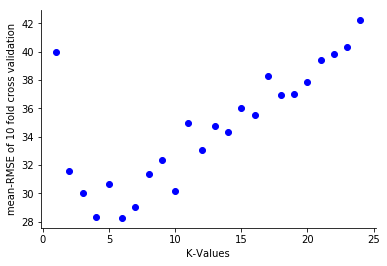

In [145]:
# enter your code here
import matplotlib
K = [i for i in range(1,25)] # store values from 1 to 25 in K
rmse_k = [] # store the different RMSEs so we can plot
for i in K:
    #rmse_k.append(kf_knn(x_train, y_train, 10, ['CRIM','ZN','RM','AGE','DIS','TAX'],2, i))
    rmse_k.append(KNN_cross_validatation(10, ['CRIM','ZN','RM','AGE','DIS','TAX'],i ,X_train,y_train,2))
    
fig, ax = plt.subplots()
ax.scatter(K, rmse_k, color="blue")
plt.xlabel('K-Values')
plt.ylabel('mean-RMSE of 10 fold cross validation')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Either k=3 or k=6 would be ideal according to the scatter plot as these k-values appear to have lowest mean RMSE for 10 fold cross validation! 